IMPORT MODULES

In [1]:
import os
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.models import Sequential
from keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

LOAD THE FER-2013 DATASET

In [3]:
train_path = '../Facial Emotion Recognition/train/'
test_path = '../Facial Emotion Recognition/test/'

In [4]:
def load_data(path):
    images = []
    labels = []
    for label in os.listdir(path):
        for filename in os.listdir(path + label):
            image_path = os.path.join(path, label, filename)
            images.append(image_path)
            labels.append(label)
    return images, labels

CONVERT DATA INTO DATAFRAME

In [5]:
train_df = pd.DataFrame()
train_df['image'], train_df['label'] = load_data(train_path)

In [6]:
test_df = pd.DataFrame()
test_df['image'], test_df['label'] = load_data(test_path)

SHUFFLE THE TRAIN DATASET

In [8]:
train_df = train_df.sample(frac=1).reset_index(drop=True)

FEATURE EXTRACTION

In [9]:
def feature_extraction(images):
    features = []
    for img in tqdm(images):
        image = load_img(img, color_mode='grayscale')
        image = np.array(image)
        features.append(image)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [10]:
train_features = feature_extraction(train_df['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [11]:
test_features = feature_extraction(test_df['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
le = LabelEncoder()
le.fit(train_df['label'])
y_train = le.transform(train_df['label'])
y_test = le.transform(test_df['label'])

In [14]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

BUILDING THE MODEL

In [15]:
model = Sequential()

In [16]:
#convolutional layers

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

In [17]:
#fully connected layers

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

In [18]:
#output layer

model.add(Dense(7, activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
recognition = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 469s 2s/step - accuracy: 0.2438 - loss: 1.8329 - val_accuracy: 0.2471 - val_loss: 1.8237
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 510s 2s/step - accuracy: 0.2524 - loss: 1.8068 - val_accuracy: 0.2590 - val_loss: 1.7632
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 518s 2s/step - accuracy: 0.2842 - loss: 1.7323 - val_accuracy: 0.3727 - val_loss: 1.5950
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 517s 2s/step - accuracy: 0.3641 - loss: 1.5979 - val_accuracy: 0.4391 - val_loss: 1.4205
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 506s 2s/step - accuracy: 0.4142 - loss: 1.5034 - val_accuracy: 0.4749 - val_loss: 1.3410
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 637s 3s/step - accuracy: 0.4486 - loss: 1.4333 - val_accuracy: 0.4950 - val_loss: 1.3007
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 532s 2s/step - accuracy: 0.4740 - loss: 1.3729 - val_accuracy: 0.5065 - val_loss: 1.2638
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 480s 2s/step - accuracy: 0.4880 - loss: 1.3546 - 

In [22]:
model.save('facial_emotion_recognition_model.keras')

METRICS

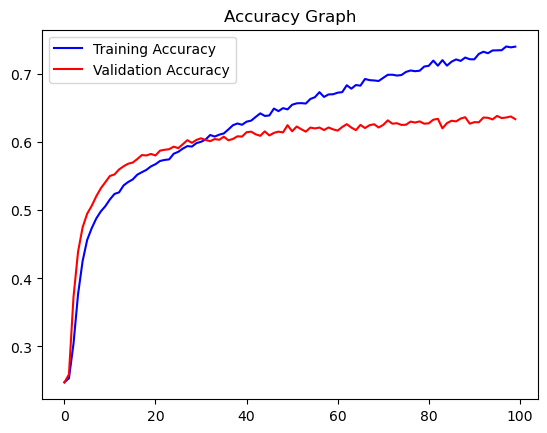

<Figure size 640x480 with 0 Axes>

In [24]:
acc = recognition.history['accuracy']
val_acc = recognition.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
plt.show()

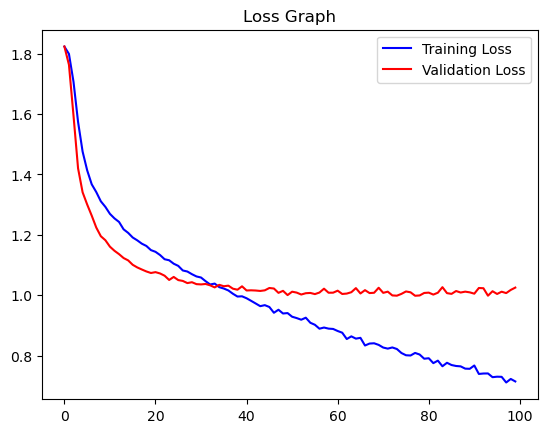

In [25]:
loss = recognition.history['loss']
val_loss = recognition.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

TEST

Original Output: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Output: sad


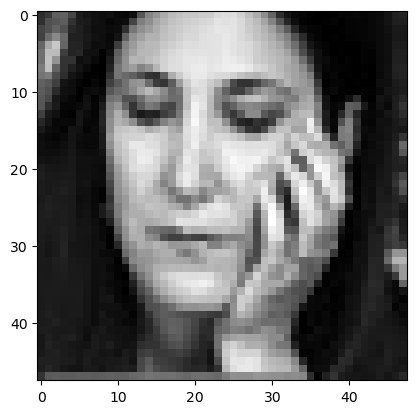

In [50]:
img_index = random.randint(0, len(test_df))
print("Original Output:", test_df['label'][img_index])
pred = model.predict(x_test[img_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[img_index].reshape(48, 48), cmap='gray');